In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [3]:
print(os.listdir('../input'))

['household_power_consumption.txt']


In [4]:
df = pd.read_csv('../input/household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


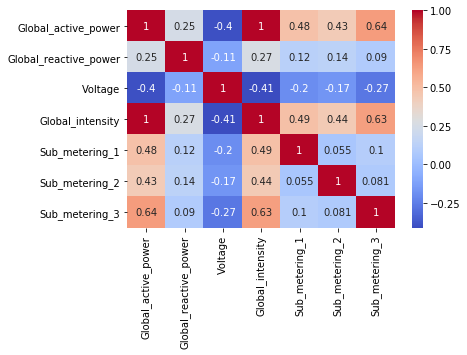

In [6]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [16]:
df.shape

(2075259, 7)

In [17]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

There are Null values in the dataset

In [18]:
import sklearn

In [10]:
from sklearn.impute import KNNImputer

ImportError: cannot import name 'KNNImputer'

In [11]:
droping_list_all=[]
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [12]:
for j in range(0,7):
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [19]:
import plotly

In [20]:
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



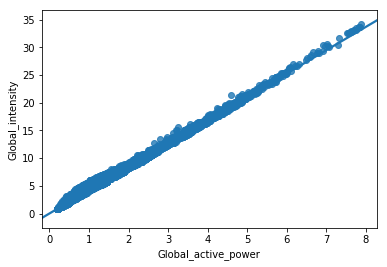

In [15]:
#import plotly.express as px
fig = sns.regplot(data=df.iloc[:10000,:], x = "Global_active_power", y = "Global_intensity",scatter=True)

Global_active_power seems to have perfect correlation with target

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


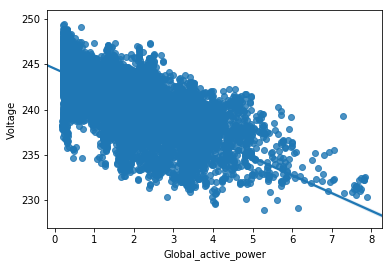

In [15]:
#import plotly.express as px
fig = sns.regplot(data=df.iloc[:10000,:], x = "Global_active_power", y = "Voltage",scatter=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


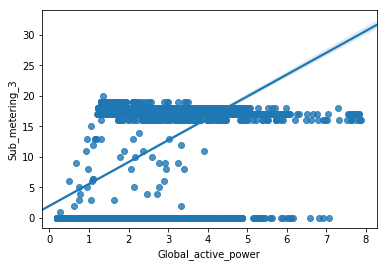

In [14]:
#import plotly.express as px
fig = sns.regplot(data=df.iloc[:10000,:], x = "Global_active_power", y = "Sub_metering_3",scatter=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


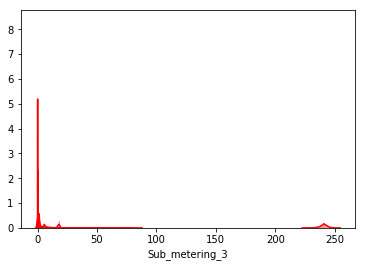

In [18]:
for col in df.columns:
    sns.distplot(df[col] , color ='red')

In [16]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [21]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        print(len(dff.columns))
        print(cols[0].shape)
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(5, 0, -1):
        cols.append(dff.shift(-i).loc[:,0])
        #print(len(cols))
        print(cols[1].shape)
        names += [('var1(t-%d)' % (i))]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        print(len(cols))
        print(len(names))
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [22]:
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [25]:
reframed2.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.322555,0.455597,0.488550,0.509006,0.545045,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.301032,0.322555,0.455597,0.488550,0.509006,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.273201,0.301032,0.322555,0.455597,0.488550,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.501108,0.273201,0.301032,0.322555,0.455597,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.227338,0.501108,0.273201,0.301032,0.322555,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917


In [23]:
values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)
reframed.drop(reframed.columns[[13,14,15,16,17,18]], axis=1, inplace=True)
reframed.head()

7
(34589, 7)
(34589,)
(34589,)
(34589,)
(34589,)
(34589,)
7
19
(34584, 19)


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.322555,0.455597,0.488550,0.509006,0.545045,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.301032,0.322555,0.455597,0.488550,0.509006,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.273201,0.301032,0.322555,0.455597,0.488550,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.501108,0.273201,0.301032,0.322555,0.455597,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.227338,0.501108,0.273201,0.301032,0.322555,0.455597


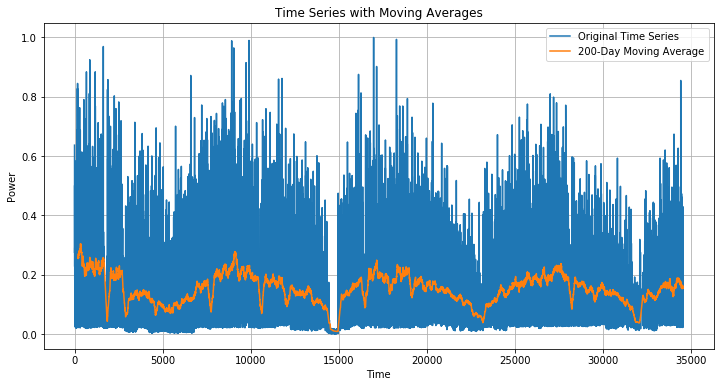

In [28]:
window_size = 200  # Adjust the window size based on your requirement
moving_avg = reframed['var1(t)'].rolling(window=window_size).mean()
df = reframed
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['var1(t)'], label='Original Time Series')
plt.plot(df.index, moving_avg, label=f'{window_size}-Day Moving Average')

plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Time Series with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

We can identify 4 cycles of seasons, each with length 9000 from the above plot, where in each cycle there is an upward trend, followed by a downward trend. The 3 cycles are from indexes 0-5000, 5000-14000,
14000-23000, 23000-32000, 32000-till the end.
We can also observe that each cycles form a cosine like curve 

We will use seasonal difference by subtracting each value with the one 9000 steps prior to it.

In [39]:
reframed['diff'] = reframed['var1(t)'] - np.roll(reframed['var1(t)'],9000)

Let's plot the data again

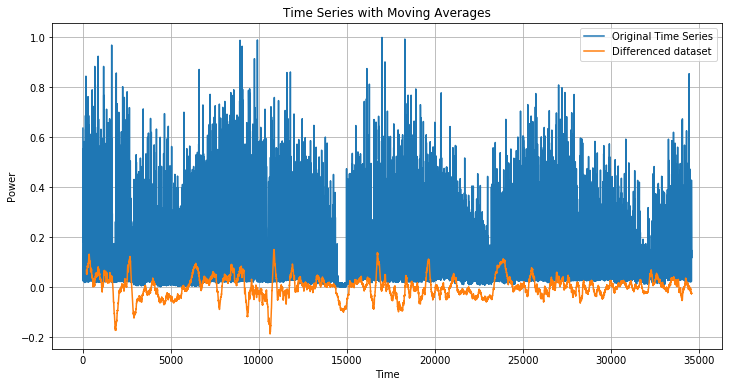

In [40]:
window_size = 200  # Adjust the window size based on your requirement
moving_avg = reframed['diff'].rolling(window=window_size).mean()
df = reframed
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['var1(t)'], label='Original Time Series')
plt.plot(df.index, moving_avg, label=f'Differenced dataset')

plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Time Series with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

Great, the trend seems to have been removed and stored in the diff variable.

The moving average shows that the power seems like an oscillating curve with periodicity

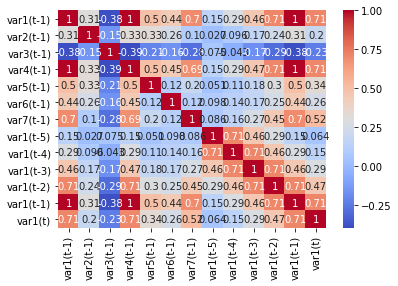

In [20]:
sns.heatmap(reframed.corr(), annot = True, cmap='coolwarm')

In [41]:
print(values.shape)

(34589, 7)


In [18]:
reframed_dx = reframed.iloc[:,8:12]-reframed.shift(-1,axis='columns').iloc[:,8:12]

In [19]:
reframed_dx.head()

,var1(t-4),var1(t-3),var1(t-2),var1(t-1)
0,-0.032953,-0.020456,-0.036039,-0.091771
1,-0.133043,-0.032953,-0.020456,-0.036039
2,-0.021523,-0.133043,-0.032953,-0.020456
3,-0.027831,-0.021523,-0.133043,-0.032953
4,0.227907,-0.027831,-0.021523,-0.133043


In [48]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t),rolling_mean,diff
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.322555,0.455597,0.488550,0.509006,0.545045,0.636816,NaN,0.602709
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.301032,0.322555,0.455597,0.488550,0.509006,0.545045,NaN,0.405130
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.273201,0.301032,0.322555,0.455597,0.488550,0.509006,NaN,0.124896
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.501108,0.273201,0.301032,0.322555,0.455597,0.488550,NaN,0.159309
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.227338,0.501108,0.273201,0.301032,0.322555,0.455597,NaN,0.134063


In [51]:
reframed_cols = reframed.columns.tolist()
column_index = reframed_cols.index('var1(t)')
reframed_cols.append(reframed_cols.pop(column_index))

In [54]:
reframed = reframed[reframed_cols]

In [59]:
reframed = reframed.bfill()

In [60]:
reframed.head()

,var1(t-1),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t-1),rolling_mean,diff,var1(t)
0,0.545045,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.322555,0.455597,0.488550,0.509006,0.545045,0.545045,0.268678,0.602709,0.636816
1,0.509006,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.301032,0.322555,0.455597,0.488550,0.509006,0.509006,0.268678,0.405130,0.545045
2,0.488550,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.273201,0.301032,0.322555,0.455597,0.488550,0.488550,0.268678,0.124896,0.509006
3,0.455597,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.501108,0.273201,0.301032,0.322555,0.455597,0.455597,0.268678,0.159309,0.488550
4,0.322555,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.227338,0.501108,0.273201,0.301032,0.322555,0.322555,0.268678,0.134063,0.455597


In [93]:
values = reframed.values
n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
#train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
#test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [94]:
train_x.shape

(8760, 16)

In [33]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)


from sklearn.linear_model import LinearRegression
# Initialize your model (e.g., Linear Regression)
model = LinearRegression()

# Lists to store the performance metrics for each fold
mse_scores = []
r_squared = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(train_x):
    X_train, X_test = train_x[train_index], train_x[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    r_squared.append(model.score(X_test,y_test))

# Calculate the average performance metric across all folds
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r_squared)
print("Average MSE:", average_mse)
print("Average R2:", average_r2)

Average MSE: 0.01039327204323277
Average R2: 0.45698861204832575


In [38]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)


from sklearn.linear_model import Ridge
# Initialize your model (e.g., Linear Regression)
model = Ridge(alpha=0.1)

# Lists to store the performance metrics for each fold
mse_scores = []
r_squared = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(train_x):
    X_train, X_test = train_x[train_index], train_x[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    r_squared.append(model.score(X_test,y_test))

# Calculate the average performance metric across all folds
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r_squared)
print("Average MSE:", average_mse)
print("Average R2:", average_r2)

Average MSE: 0.010456503153003777
Average R2: 0.4530503841350605


**Applying Huber Regularized Regressor**

In [37]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)


from sklearn.linear_model import HuberRegressor
# Initialize your model (e.g., Linear Regression)
model = HuberRegressor(alpha=0.1)

# Lists to store the performance metrics for each fold
mse_scores = []
r_squared = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(train_x):
    X_train, X_test = train_x[train_index], train_x[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    r_squared.append(model.score(X_test,y_test))

# Calculate the average performance metric across all folds
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r_squared)
print("Average MSE:", average_mse)
print("Average R2:", average_r2)

Average MSE: 0.010519533465827024
Average R2: 0.4493980043916762


Huber regressor decreased our loss and R2 score and hence is more robust to outliers.

In [34]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

from sklearn.ensemble import RandomForestRegressor
# Initialize your model (e.g., Linear Regression)
model = RandomForestRegressor()

r_squared = []
# Lists to store the performance metrics for each fold
mse_scores = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(train_x):
    X_train, X_test = train_x[train_index], train_x[test_index]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    r_squared.append(model.score(X_test,y_test))

# Calculate the average performance metric across all folds
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r_squared)
print("Average MSE:", average_mse)
print("Average R2:", average_r2)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Average MSE: 0.0108335984266515
Average R2: 0.41963750650784853


In [95]:
print(train_x.shape)

(8760, 16)


In [96]:
k=4
train_x = np.reshape(train_x,[train_x.shape[0]//k,k,16])
print(train_x.shape)

(2190, 4, 16)


In [97]:
train_y = np.reshape(train_y,[train_y.shape[0]//k,k])
test_y = np.reshape(test_y,[test_y.shape[0]//k,k])

In [98]:
train_y.shape

(2190, 4)

In [99]:
test_y.shape

(6456, 4)

In [100]:
test_x = np.reshape(test_x,[test_x.shape[0]//k,k,16])

In [101]:
test_x.shape

(6456, 4, 16)

In [62]:
train_x = np.squeeze(train_x,1)
test_x = np.squeeze(test_x,1)

In [102]:
from keras.layers import Layer
from keras import backend as K
import keras.layers as layers
import tensorflow as tf

In [103]:
import keras.backend as K

In [ ]:
tf.squeeze(tf.gather(out,[3],axis=1),1)

In [104]:
def tSpline(inputs, degree):
    outc = layers.Conv1D(100,kernel_size=4,activation='relu')(out)
    out13 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k**2,x),-2,keepdims=True))(outc)#layers.Multiply()([k,out])
    out12 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k1**2,x),-2,keepdims=True))(outc)
    out11 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k2**2,x),-2,keepdims=True))(outc)
    out10 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k3**2,x),-2,keepdims=True))(outc)

In [114]:
def additive_splinemodel():
    inp = layers.Input(shape=(4,16))
    
    #kN are the values corrsponding to time difference between current timestep and
    #N time steps behind.
    k = K.constant([4,3,2,1],dtype=tf.float32); k3 = K.constant([1,0,0,0],dtype=tf.float32)
    k1 = K.constant([3,2,1,0],dtype=tf.float32); k2 = K.constant([2,1,0,0],dtype=tf.float32)
    k = k[tf.newaxis,:,tf.newaxis]; k1 = k1[tf.newaxis,:,tf.newaxis]; k2 = k2[tf.newaxis,:,tf.newaxis]
    k3 = k3[tf.newaxis,:,tf.newaxis]
    
    out = layers.Dense(50,activation='relu')(inp)
    
    '''Spline Functions of the form f(x) = F(x)*(t-t0)**2, these functions are basic
    taylor series approximation of the dataset.'''
    
    outc = layers.Conv1D(50,kernel_size=4,activation='relu')(out)
    out13 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k**2,x),-2,keepdims=True))(outc)#layers.Multiply()([k,out])
    out12 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k1**2,x),-2,keepdims=True))(outc)
    out11 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k2**2,x),-2,keepdims=True))(outc)
    out10 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k3**2,x),-2,keepdims=True))(outc)
    
    out3 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k,x),-2,keepdims=True))(out)#layers.Multiply()([k,out])
    out2 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k1,x),-2,keepdims=True))(out)
    out1 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k2,x),-2,keepdims=True))(out)
    out0 = layers.Lambda(lambda x: tf.reduce_sum(tf.math.multiply(k3,x),-2,keepdims=True))(out)
    #print(inp2.shape)
    x2 = layers.Concatenate(axis=1)([out0,out1,out2,out3])
    x3 = layers.Concatenate(axis=1)([out10,out11,out12,out13])
    x = layers.Concatenate()([out,x2,x3])
    print(f'x:{x.shape}')
    print(x2.shape)
    pred = layers.Dense(1,activation='linear')(x)
    print(pred.shape)
    return keras.Model(inputs=inp,outputs=pred)

m = additive_splinemodel()

x:(?, 4, 150)
(?, 4, 50)
(?, 4, 1)


In [80]:
m = additive_splinemodel()

(?, 4, 50)
(?, 1, 50)


In [ ]:
for i in range(additive_rounds):
    inp = layers.Input(shape=(4,12))
    out = m(x)
    f = tSpline(t)(x)
    out = out + f
    m = layers.Dense(1,activation='linear')(out)
    return keras.Model(inputs=inp,outputs=pred)

In [106]:
def edim(inp):
    return tf.expand_dims(inp,-1)
train_y = edim(train_y)
test_y = edim(test_y)

In [107]:
train_y.shape

TensorShape([Dimension(2190), Dimension(4), Dimension(1)])

In [110]:
test_x.shape

(6456, 4, 16)

In [115]:
m.compile(loss='mean_squared_error', optimizer='adam')
history = m.fit(train_x, train_y, epochs=100, steps_per_epoch=219, validation_data=(test_x, test_y), validation_steps=645, verbose=2, shuffle=False)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Train on 2190 samples, validate on 6456 samples
Epoch 1/100
 - 23s - loss: 0.0310 - val_loss: 0.0088
Epoch 2/100
 - 21s - loss: 0.0054 - val_loss: 0.0057
Epoch 3/100
 - 21s - loss: 0.0038 - val_loss: 0.0049
Epoch 4/100
 - 21s - loss: 0.0034 - val_loss: 0.0045
Epoch 5/100


KeyboardInterrupt: 

Train on 2190 samples, validate on 6456 samples
Epoch 1/100
 - 1s - loss: 0.0171 - val_loss: 0.0118
Epoch 2/100
 - 0s - loss: 0.0150 - val_loss: 0.0101
Epoch 3/100
 - 0s - loss: 0.0147 - val_loss: 0.0098
Epoch 4/100
 - 0s - loss: 0.0136 - val_loss: 0.0095
Epoch 5/100
 - 0s - loss: 0.0126 - val_loss: 0.0091
Epoch 6/100
 - 0s - loss: 0.0120 - val_loss: 0.0088
Epoch 7/100
 - 0s - loss: 0.0116 - val_loss: 0.0086
Epoch 8/100
 - 0s - loss: 0.0113 - val_loss: 0.0085
Epoch 9/100
 - 0s - loss: 0.0111 - val_loss: 0.0084
Epoch 10/100
 - 0s - loss: 0.0110 - val_loss: 0.0083
Epoch 11/100
 - 0s - loss: 0.0108 - val_loss: 0.0083
Epoch 12/100
 - 0s - loss: 0.0107 - val_loss: 0.0083
Epoch 13/100
 - 0s - loss: 0.0107 - val_loss: 0.0083
Epoch 14/100
 - 0s - loss: 0.0106 - val_loss: 0.0082
Epoch 15/100
 - 0s - loss: 0.0106 - val_loss: 0.0082
Epoch 16/100
 - 0s - loss: 0.0105 - val_loss: 0.0082
Epoch 17/100
 - 0s - loss: 0.0105 - val_loss: 0.0082
Epoch 18/100
 - 0s - loss: 0.0105 - val_loss: 0.0082
Epoch 1

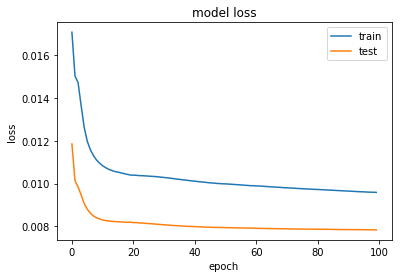

In [152]:
m.compile(loss='mean_squared_error', optimizer='adam')
history = m.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [143]:
history = m.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

Train on 2190 samples, validate on 6456 samples
Epoch 1/100
 - 1s - loss: 0.0454 - val_loss: 0.0165
Epoch 2/100
 - 0s - loss: 0.0159 - val_loss: 0.0116
Epoch 3/100
 - 0s - loss: 0.0147 - val_loss: 0.0107
Epoch 4/100
 - 0s - loss: 0.0139 - val_loss: 0.0103
Epoch 5/100
 - 0s - loss: 0.0134 - val_loss: 0.0099
Epoch 6/100
 - 0s - loss: 0.0130 - val_loss: 0.0096
Epoch 7/100
 - 0s - loss: 0.0125 - val_loss: 0.0093
Epoch 8/100
 - 0s - loss: 0.0122 - val_loss: 0.0091
Epoch 9/100
 - 0s - loss: 0.0119 - val_loss: 0.0089
Epoch 10/100
 - 0s - loss: 0.0117 - val_loss: 0.0087
Epoch 11/100
 - 0s - loss: 0.0114 - val_loss: 0.0086
Epoch 12/100
 - 0s - loss: 0.0113 - val_loss: 0.0085
Epoch 13/100
 - 0s - loss: 0.0111 - val_loss: 0.0084
Epoch 14/100
 - 0s - loss: 0.0110 - val_loss: 0.0083
Epoch 15/100
 - 0s - loss: 0.0109 - val_loss: 0.0083
Epoch 16/100
 - 0s - loss: 0.0108 - val_loss: 0.0082
Epoch 17/100
 - 0s - loss: 0.0107 - val_loss: 0.0082
Epoch 18/100
 - 0s - loss: 0.0107 - val_loss: 0.0082
Epoch 1

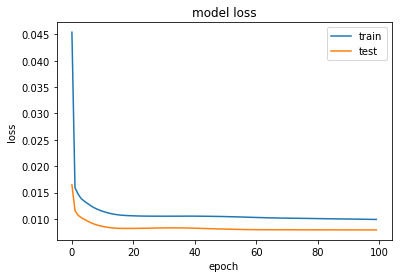

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [131]:
train_x.shape

(2190, 4, 12)

In [133]:
train_y = train_y[:,:,np.newaxis]
test_y = test_y[:,:,np.newaxis]

In [134]:
train_y.shape

(2190, 4, 1)

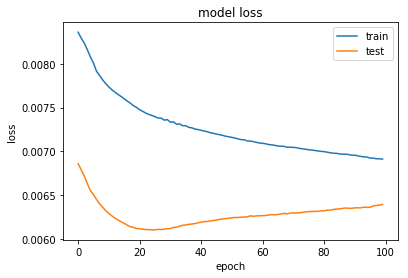

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [139]:
history = m.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

Train on 2190 samples, validate on 6456 samples
Epoch 1/100
 - 0s - loss: 0.0084 - val_loss: 0.0069
Epoch 2/100
 - 0s - loss: 0.0083 - val_loss: 0.0068
Epoch 3/100
 - 0s - loss: 0.0082 - val_loss: 0.0067
Epoch 4/100
 - 0s - loss: 0.0082 - val_loss: 0.0066
Epoch 5/100
 - 0s - loss: 0.0081 - val_loss: 0.0066
Epoch 6/100
 - 0s - loss: 0.0080 - val_loss: 0.0065
Epoch 7/100
 - 0s - loss: 0.0079 - val_loss: 0.0065
Epoch 8/100
 - 0s - loss: 0.0079 - val_loss: 0.0064
Epoch 9/100
 - 0s - loss: 0.0078 - val_loss: 0.0064
Epoch 10/100
 - 0s - loss: 0.0078 - val_loss: 0.0063
Epoch 11/100
 - 0s - loss: 0.0077 - val_loss: 0.0063
Epoch 12/100
 - 0s - loss: 0.0077 - val_loss: 0.0063
Epoch 13/100
 - 0s - loss: 0.0077 - val_loss: 0.0062
Epoch 14/100
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 15/100
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 16/100
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 17/100
 - 0s - loss: 0.0076 - val_loss: 0.0062
Epoch 18/100
 - 0s - loss: 0.0075 - val_loss: 0.0061
Epoch 1

In [66]:
history = m.fit(train_x, train_y, epochs=20, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 25824 samples
Epoch 1/20
 - 1s - loss: 0.0270 - val_loss: 0.0138
Epoch 2/20
 - 0s - loss: 0.0115 - val_loss: 0.0111
Epoch 3/20
 - 0s - loss: 0.0104 - val_loss: 0.0109
Epoch 4/20
 - 1s - loss: 0.0101 - val_loss: 0.0109
Epoch 5/20
 - 0s - loss: 0.0099 - val_loss: 0.0109
Epoch 6/20
 - 0s - loss: 0.0098 - val_loss: 0.0108
Epoch 7/20
 - 0s - loss: 0.0097 - val_loss: 0.0107
Epoch 8/20
 - 0s - loss: 0.0096 - val_loss: 0.0107
Epoch 9/20
 - 0s - loss: 0.0096 - val_loss: 0.0107
Epoch 10/20
 - 0s - loss: 0.0095 - val_loss: 0.0106
Epoch 11/20
 - 0s - loss: 0.0095 - val_loss: 0.0105
Epoch 12/20
 - 0s - loss: 0.0094 - val_loss: 0.0104
Epoch 13/20
 - 0s - loss: 0.0094 - val_loss: 0.0103
Epoch 14/20
 - 0s - loss: 0.0093 - val_loss: 0.0103
Epoch 15/20
 - 0s - loss: 0.0093 - val_loss: 0.0102
Epoch 16/20
 - 0s - loss: 0.0093 - val_loss: 0.0101
Epoch 17/20
 - 0s - loss: 0.0093 - val_loss: 0.0100
Epoch 18/20
 - 0s - loss: 0.0092 - val_loss: 0.0100
Epoch 19/20
 - 0s - loss

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_x, train_y, epochs=20, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], 13))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_x[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
aa=[x for x in range(400)]
plt.plot(aa, inv_y[:400], marker='.', label="actual")
plt.plot(aa, inv_yhat[:400], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()